# Team-1-ExcelR-P57

# Topic Modelling

## Business objective
Social event tracking and evolution framework to obtain the evolutionary trends of social events and generate effective event summary details over time. The input is the  textual data collected from various social media. Based on the input data, our algorithm can learn multi-modality topics and track multiple events. After tracking, for each event, it can be visualized with texts and image over time. 

## Data Set Details:
Extraction of the textual data from various web sources like "Twitter"

In [3]:
# Importing important libraries
import tweepy
import pandas as pd
import re
import emoji
import nltk

In [4]:
# set variables for keys and tokens to access the Twitter API
mykeys = open('D:\\jupyter notebook workspace\\PROJECTS\\Topic Modeling\\tweetfile.txt', 'r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

auth = tweepy.OAuthHandler(consumer_key=api_key,
                           consumer_secret=api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Featching the data from twitter
search_words = "News"
date_since = "2021-07-10"
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since)

In [6]:
tweets

In [7]:
import re

In [8]:
# Collect tweets
tweets = tweepy.Cursor(api.search, q=search_words, lang="en",
                       since=date_since).items(300)

# Iterate and print tweets
s = []
for tweet in tweets:
    s.append(tweet.text)

In [9]:
print(s)

['RT @erogers8877: Why are people upset at Biden/Facebook and not Fox News?', 'RT @OpIndia_com: Former Union Minister @rsprasad calls out The Wire, says have spread plenty fake news in the past. He also said Amnesty re…', 'RT @AnimalAid: Animal Aid’s undercover investigation shows horses &amp; ponies slaughtered in a UK abattoir. Uncapped breeding leads to thousan…', 'RT @KT_So_It_Goes: I want the confidence of a news show killing its own viewers', 'RT @greenspacescot: Could Glasgow become the next\nNational Park City? Find out more about this exciting\nproposal for a greener, healthier,…', 'RT @SaeedCricky: Good News : \n\nAustralia &amp; Newzealand coming to Pakistan next year for cricket series.\n\n"There’s no reason why either New Z…', 'RT @CarolLeonnig: NEW &gt;&gt; Trump regrets almost nothing - but he  told us he has one regret from his presidency:  he wishes he had unleashed…', "RT @lukemcgee: Big Brexit thing happened Friday that didn't get much attention: Commission determine

In [10]:
import pandas as pd
df=pd.DataFrame({'tweet':s})
df

,tweet
0,RT @erogers8877: Why are people upset at Biden...
1,RT @OpIndia_com: Former Union Minister @rspras...
2,RT @AnimalAid: Animal Aid’s undercover investi...
3,RT @KT_So_It_Goes: I want the confidence of a ...
4,RT @greenspacescot: Could Glasgow become the n...
...,...
295,@MattAdkin @Begentle50 @Chris_not_a_bot @Matt_...
296,RT @lockwoodx3: CIA Considered Bombing Miami a...
297,"https://t.co/2JbhkvDkot Have you seen this, gu..."
298,RT @AFP: Climate change has dramatically alter...


In [11]:
# pd.set_option(df)
# df1

In [12]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

201

In [13]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

180

In [14]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
222,RT @latifnasser: I’ve been waiting years to wr...,3
123,RT @KT_So_It_Goes: I want the confidence of a ...,3
217,RT @kgosi_maepa: BREAKING NEWS - Tshwane is of...,3
152,RT @SatlokChannel: Let’s celebrate this year’s...,2
225,RT @moonlightgyuu: duit raya ga 🇲🇾 since today...,2
120,RT @Jerusalem_Post: #Israel bans entry to #vac...,2
161,RT @TheBabylonBee: Froot Loops Finally Changes...,2
219,RT @kylegriffin1: CBS News poll:\n\n58% of Ame...,2
248,RT @waltshaub: Fox News is killing people to g...,2
229,RT @nugupromoter: Former WA$$UP member Jiae ma...,2


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [17]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [18]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,RT @erogers8877: Why are people upset at Biden...,True,[@erogers8877],[],[]
1,RT @OpIndia_com: Former Union Minister @rspras...,True,[@OpIndia_com],[@rsprasad],[]
2,RT @AnimalAid: Animal Aid’s undercover investi...,True,[@AnimalAid],[],[]
3,RT @KT_So_It_Goes: I want the confidence of a ...,True,[@KT_So_It_Goes],[],[]
4,RT @greenspacescot: Could Glasgow become the n...,True,[@greenspacescot],[],[]
...,...,...,...,...,...
295,@MattAdkin @Begentle50 @Chris_not_a_bot @Matt_...,False,[],"[@MattAdkin, @Begentle50, @Chris_not_a_bot, @M...",[]
296,RT @lockwoodx3: CIA Considered Bombing Miami a...,True,[@lockwoodx3],[],[#HandsOffCuba]
297,"https://t.co/2JbhkvDkot Have you seen this, gu...",False,[],"[@laowhy86, @serpentza]","[#China, #CyberAttack]"
298,RT @AFP: Climate change has dramatically alter...,True,[@AFP],[],[]


In [19]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [20]:
hashtags_list_df

,hashtags
12,[#NousSavons]
13,[#EidAlAdha]
14,[#Unio]
17,[#LifeEsidimeni]
21,[#beatimekbc]
...,...
282,[#PORTOFDUBLIN]
286,[#PlayToEarn]
290,[#EOSCAssociation]
296,[#HandsOffCuba]


In [21]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [22]:
flattened_hashtags_df

,hashtag
0,#NousSavons
1,#EidAlAdha
2,#Unio
3,#LifeEsidimeni
4,#beatimekbc
...,...
114,#PlayToEarn
115,#EOSCAssociation
116,#HandsOffCuba
117,#China


In [23]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

98

In [24]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [25]:
popular_hashtags

,hashtag,counts
0,#COVID19,4
1,#TheOtherLatif,3
2,#yyc,2
3,#EidAlAdha,2
4,#Stream,2
...,...,...
93,#Liberia,1
94,#Lebanon,1
95,#LeMans,1
96,#Kavin,1


In [26]:
# take hashtags which appear at least this amount of times
min_appearance =10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [27]:
popular_hashtags_set

set()

In [28]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
hashtags_list_df

,hashtags,popular_hashtags
12,[#NousSavons],[]
13,[#EidAlAdha],[]
14,[#Unio],[]
17,[#LifeEsidimeni],[]
21,[#beatimekbc],[]
...,...,...
282,[#PORTOFDUBLIN],[]
286,[#PlayToEarn],[]
290,[#EOSCAssociation],[]
296,[#HandsOffCuba],[]


In [29]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags


In [30]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [31]:
hashtag_vector_df

,popular_hashtags


In [32]:
import seaborn as sns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
hashtag_matrix

""


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


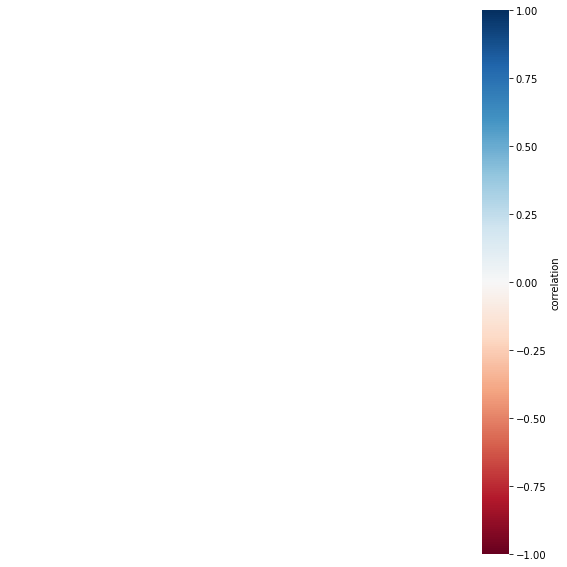

In [33]:

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

# Data Cleaning & Pre-Processing

In [34]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [35]:
import nltk
words = set(nltk.corpus.words.words())

In [36]:

tweet=np.array(df.tweet)
tweet
cleaned_tweet=[]
for i in df.tweet:
    no_punc_text = i.translate(str.maketrans('', '', string.punctuation))
    no_punc_text=re.sub("(RT)?(ht)?", "", no_punc_text) # to remove RT and ht word
    no_punc_text1=re.sub("[\W\d]", " ", no_punc_text) #to remove not word character and numbers
    no_punc_text2=re.sub("[^a-zA-Z]", " ", no_punc_text1) #to remove forien language word character
    no_punc_text2=" ".join(w for w in nltk.wordpunct_tokenize(no_punc_text2) \
         if w.lower() in words or not w.isalpha())
    cleaned_tweet.append(no_punc_text2)
df['cleaned_tweet']=cleaned_tweet
df['cleaned_tweet']

0               Why are people upset at and not Fox News
1      Former Union Minister out The Wire have spread...
2      Animal Aid s undercover investigation in a aba...
3      I want the confidence of a news show killing i...
4      Could become the next National Park City Find ...
                             ...                        
295                                                     
296                    Considered and Killing to Blame I
297                             Have you seen this China
298    Climate change dramatically the Swiss Alp land...
299                                    and what the news
Name: cleaned_tweet, Length: 300, dtype: object

In [37]:
df1=df.copy() 
corpus=df1.cleaned_tweet.unique()

In [38]:
len(corpus)

277

##### Text Preprocessing
Steps to preprocess text data:

Convert the text into lowercase <br> 
Split text into words  <br>
Remove the stop loss words <br>
Remove the Punctuation, any symbols and special characters <br>
Normalize the word (I'll be using Lemmatization for normalization) <br>

In [39]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

# import nltk
# nltk.download('wordnet')

In [40]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
# import nltk
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [41]:

# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))
stopwords = set(stop)

stopwords.update(["new","news",'via','take','first','one','say','time','big'])

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word,get_wordnet_pos(word)) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [42]:
clean_corpus

[['people', 'upset', 'fox'],
 ['former',
  'union',
  'minister',
  'wire',
  'spread',
  'plenty',
  'fake',
  'past',
  'also',
  'say',
  'amnesty'],
 ['animal',
  'aid',
  'undercover',
  'investigation',
  'abattoir',
  'uncapped',
  'breeding'],
 ['want', 'confidence', 'show', 'kill'],
 ['could',
  'become',
  'next',
  'national',
  'park',
  'city',
  'find',
  'excite',
  'proposal',
  'greener'],
 ['good',
  'come',
  'next',
  'year',
  'cricket',
  'series',
  'reason',
  'either',
  'z'],
 ['trump',
  'almost',
  'nothing',
  'told',
  'u',
  'regret',
  'presidency',
  'unleashed'],
 ['thing',
  'didnt',
  'get',
  'much',
  'attention',
  'commission',
  'determine',
  'able',
  'join'],
 ['police', 'men', 'want', 'contact', 'connection', 'disorder', 'final'],
 ['tory', 'actually', 'mean', 'level', 'irony'],
 ['please', 'get', 'friend', 'cause', 'mess'],
 ['prime', 'minister', 'phone', 'opposition', 'leader', 'list', 'p'],
 ['vaccine', 'resistance'],
 ['let', 'celebrate'

In [43]:
# to remove the meaningless words 
#doc=[]
corpus1=[]
for i in clean_corpus:
    doc=[]
    #j=i.split()
    for z in i:
        #print(len(z))
        if len(z)>2:
            doc.append(z)
    #print(doc)
    doc=" ".join(doc)
    doc1=doc.split()
    #print(doc1)
    corpus1.append(doc1)
clean_corpus=corpus1
clean_corpus

abc = []
for i in clean_corpus:
    abc.append(' '.join(i))
abc

abc2=" ".join(abc)

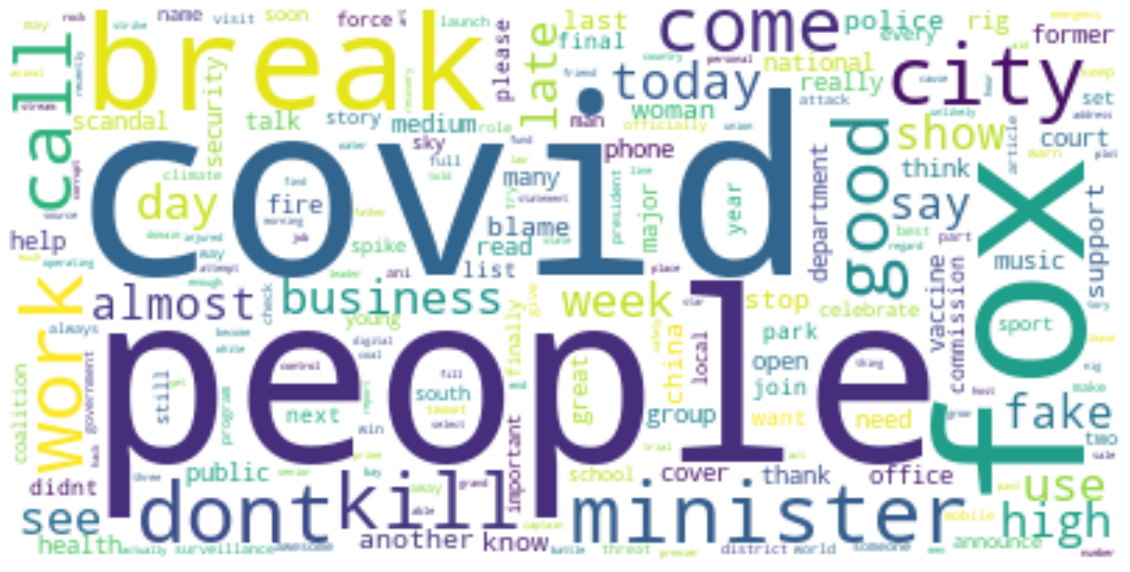

In [44]:
from wordcloud import WordCloud 
wordcloud_spam = WordCloud(background_color="white").generate(abc2)


# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# # to remove the meaningless words 
# #doc=[]
# corpus1=[]
# for i in clean_corpus:
#     doc=[]
#     #j=i.split()
#     for z in i:
#         #print(len(z))
#         if len(z)>2:
#             doc.append(z)
#     #print(doc)
#     doc=" ".join(doc)
#     doc1=doc.split()
#     #print(doc1)
#     corpus1.append(doc1)
# clean_corpus=corpus1
# clean_corpus

##### Convert Text into Numerical Representation
###### Converting the clean preprocessed corpus to array

In [46]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [47]:
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

In [48]:
# Materialize the sparse data
data_dense = cv_arr.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.5773174233648609 %


In [49]:
# this is our converted text to numerical representation from the Tf-IDF vectorizer
tf_idf_arr

<277x963 sparse matrix of type '<class 'numpy.float64'>'
	with 1540 stored elements in Compressed Sparse Row format>

In [50]:
# this is our converted text to numerical representation from the Count vectorizer
cv_arr

<277x963 sparse matrix of type '<class 'numpy.int64'>'
	with 1540 stored elements in Compressed Sparse Row format>

In [51]:
# Creating vocabulary array which will represent all the corpus 
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

# get the vocb list
vocab_tf_idf

['abattoir',
 'able',
 'absolutely',
 'abuse',
 'academic',
 'access',
 'accessibility',
 'account',
 'accreditation',
 'accuse',
 'achieve',
 'across',
 'act',
 'action',
 'active',
 'activist',
 'activity',
 'actor',
 'actress',
 'actually',
 'adapt',
 'address',
 'administration',
 'advisory',
 'agenda',
 'aid',
 'air',
 'aircraft',
 'airdrop',
 'airport',
 'ait',
 'aka',
 'album',
 'allow',
 'almost',
 'alone',
 'alp',
 'also',
 'alternate',
 'always',
 'amaze',
 'amid',
 'amnesty',
 'analysis',
 'anarchy',
 'ancient',
 'ani',
 'animal',
 'ann',
 'announce',
 'announcement',
 'another',
 'anti',
 'anyway',
 'apparently',
 'appeal',
 'apple',
 'approach',
 'approve',
 'area',
 'argument',
 'army',
 'around',
 'arsenal',
 'art',
 'article',
 'artificial',
 'assurance',
 'ate',
 'athlete',
 'attack',
 'attempt',
 'attention',
 'audit',
 'authoritarian',
 'available',
 'average',
 'away',
 'awesome',
 'back',
 'bad',
 'badly',
 'bank',
 'bankrupt',
 'bar',
 'base',
 'basic',
 'basketba

In [52]:
# Creating vocabulary array which will represent all the corpus 
vocab_cv = cv_vectorizer.get_feature_names()

# get the vocb list
vocab_cv

['abattoir',
 'able',
 'absolutely',
 'abuse',
 'academic',
 'access',
 'accessibility',
 'account',
 'accreditation',
 'accuse',
 'achieve',
 'across',
 'act',
 'action',
 'active',
 'activist',
 'activity',
 'actor',
 'actress',
 'actually',
 'adapt',
 'address',
 'administration',
 'advisory',
 'agenda',
 'aid',
 'air',
 'aircraft',
 'airdrop',
 'airport',
 'ait',
 'aka',
 'album',
 'allow',
 'almost',
 'alone',
 'alp',
 'also',
 'alternate',
 'always',
 'amaze',
 'amid',
 'amnesty',
 'analysis',
 'anarchy',
 'ancient',
 'ani',
 'animal',
 'ann',
 'announce',
 'announcement',
 'another',
 'anti',
 'anyway',
 'apparently',
 'appeal',
 'apple',
 'approach',
 'approve',
 'area',
 'argument',
 'army',
 'around',
 'arsenal',
 'art',
 'article',
 'artificial',
 'assurance',
 'ate',
 'athlete',
 'attack',
 'attempt',
 'attention',
 'audit',
 'authoritarian',
 'available',
 'average',
 'away',
 'awesome',
 'back',
 'bad',
 'badly',
 'bank',
 'bankrupt',
 'bar',
 'base',
 'basic',
 'basketba

In [53]:
display(len(vocab_tf_idf))
display(len(vocab_cv))

963

963

# Implementation of LDA

To implement LDA, pass the corpus: document-term matrix to the model. We had above obtained the unique words of vocabulary using both TF-IDF and Count Vectorizer. We can continue with either as have the same unique words in both the obtained vocabularies.

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [10, 15, 20, 25, 30],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation()

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=0)
gridsearch.fit(cv_arr)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -5538.316458389016


In [55]:
# Implementation of LDA:
    
# Create object for the LDA class 
# Inside this class LDA: define the components:
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(cv_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

In [56]:
print(topic_words)

[[1.1        0.1        0.1        ... 1.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.10000682 0.1       ]
 ...
 [0.1        1.10000412 0.1        ... 0.1        0.1        1.1       ]
 [0.1        0.1        1.1        ... 0.1        1.09999318 0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]]


##### Retrieve the Topics

In [57]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 20

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    #np.argsort() is used to sort the index based on probablity
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['get' 'minister' 'good' 'fox' 'say' 'really' 'someone' 'finally' 'talk'
 'win' 'emergency' 'episode' 'back' 'airdrop' 'immunity' 'herd' 'music'
 'covid' 'vaccine']
Topic 2 ['get' 'day' 'today' 'kill' 'many' 'business' 'important' 'ani'
 'government' 'man' 'covid' 'since' 'last' 'two' 'music' 'anti' 'game'
 'near' 'personal']
Topic 3 ['police' 'week' 'covid' 'almost' 'woman' 'young' 'scandal' 'force'
 'great' 'mobile' 'office' 'last' 'generate' 'wonderful' 'father' 'speed'
 'look' 'billion' 'consider']
Topic 4 ['people' 'late' 'covid' 'rig' 'today' 'know' 'awesome' 'check' 'keep'
 'athlete' 'show' 'rock' 'three' 'public' 'audit' 'please' 'plot' 'always'
 'rise']
Topic 5 ['break' 'think' 'tweet' 'call' 'president' 'may' 'health' 'develop'
 'left' 'group' 'woman' 'best' 'stop' 'fake' 'district' 'warn' 'cause'
 'celebrate' 'friend']
Topic 6 ['minister' 'china' 'list' 'fake' 'former' 'medium' 'say' 'need' 'phone'
 'source' 'fire' 'also' 'climate' 'regard' 'leader' 'south' 'set' 'gr

 ##### Annotating the topics the documents

In [58]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(tf_idf_arr)  

# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

Document 1  -- Topic: 3
Document 2  -- Topic: 5
Document 3  -- Topic: 0
Document 4  -- Topic: 6
Document 5  -- Topic: 6
Document 6  -- Topic: 0
Document 7  -- Topic: 7
Document 8  -- Topic: 7
Document 9  -- Topic: 2
Document 10  -- Topic: 6
Document 11  -- Topic: 8
Document 12  -- Topic: 5
Document 13  -- Topic: 0
Document 14  -- Topic: 4
Document 15  -- Topic: 1
Document 16  -- Topic: 1
Document 17  -- Topic: 0
Document 18  -- Topic: 9
Document 19  -- Topic: 4
Document 20  -- Topic: 5
Document 21  -- Topic: 8
Document 22  -- Topic: 8
Document 23  -- Topic: 7
Document 24  -- Topic: 0
Document 25  -- Topic: 8
Document 26  -- Topic: 9
Document 27  -- Topic: 4
Document 28  -- Topic: 5
Document 29  -- Topic: 5
Document 30  -- Topic: 0
Document 31  -- Topic: 4
Document 32  -- Topic: 4
Document 33  -- Topic: 9
Document 34  -- Topic: 0
Document 35  -- Topic: 1
Document 36  -- Topic: 3
Document 37  -- Topic: 5
Document 38  -- Topic: 9
Document 39  -- Topic: 2
Document 40  -- Topic: 0
Document 

# This is the final output which gives us the topic along with the documents.

In [59]:
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(lda_model, cv_arr, cv_vectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [60]:
# saving the model 
import pickle 
pickle_out = open("topic_modelling.pkl", mode = "wb") 
pickle.dump(lda_model, pickle_out) 
pickle_out.close()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
